<a href="https://colab.research.google.com/github/aisha-partha/AIMLOps-Assignments/blob/main/M2_AST_02_CNN_Transfer_Learning_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Assignment 2: Leveraging a pre-trained model

## Learning Objectives:

At the end of the experiment, you will be able to:

1. Understand and use a pre-trained model
2. Fine-tune the top layers while using a pre-trained model


## Introduction

A common and highly effective approach to deep learning on small image datasets is to use a pre-trained model.

If the original dataset is large enough and general enough, the spatial hierarchy of features learned by the pre-trained model can effectively act as a generic model of the visual world, and hence, its features can prove useful for many different computer vision problems even though these new problems may involve completely different classes than those of the original task.

There are two ways to use a pre-trained model:
  * feature extraction and
  * fine-tuning

### Feature extraction

A CNN typically consists of a:
* Convolutional base
* Densely connected classifier

Key Idea -
* Features are learned by the convolutional base. So reuse it.
* Train a new classifier for your problem

![picture](https://drive.google.com/uc?export=view&id=12FzJVGUCzQGDArYSqdABntKwKGHzIjVX)

### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2304896" #@param {type:"string"}

In [ ]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9916583736" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M2_AST_02_CNN_Transfer_Learning_A" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")

    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aimlops-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Import libraries

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D,MaxPool2D
from tensorflow.keras import Input
from tensorflow.keras import Model
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let us reuse the VGG16 network which has been trained on the ImageNet, which contains multiple classes of cats and dogs among other things.

We expect the convolution base to have learned features that help it identify cats and dogs.

Keras provides us with a pre-trained VGG16 network!



In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
# Load the convolutional base
conv_base = VGG16(
    weights = "imagenet",
    include_top = False, # Don't re-use the classifier (top layers)
    input_shape = (180,180,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# See a summary of the convolutional base
# YOUR CODE HERE
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

So how do we extract the features? Simple:

Pass the images through the convolutional base.

In [ ]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/AIandMLOps/Datasets/cats_vs_dogs_small.zip
!unzip -qq '/content/cats_vs_dogs_small.zip'

In [ ]:
# defining path names for futur use
data_dir = '/content/cats_vs_dogs_small'

train_path = data_dir + '/train'
validation_path = data_dir + '/validation'
test_path = data_dir + '/test'

### Converting the image dataset into a workable format

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
# YOUR CODE HERE
train_dataset = image_dataset_from_directory(train_path,
                                             image_size=(180,180),
                                             batch_size=32)

validation_dataset = image_dataset_from_directory(validation_path,
                                                  image_size=(180,180),
                                                  batch_size=32)

test_dataset = image_dataset_from_directory(test_path,
                                            image_size=(180,180),
                                            batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


### Passing the dataset through Conv Base i.e forward pass through pre-trained weights

Before forward pass, Preprocessing the dataset specific to VGG16 is also required.

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input # Importing function for preprocessing specific to the vgg16

In [ ]:
from tqdm import tqdm
# Extracting the features from pretrained models
def get_features_and_labels(dataset):
            # YOUR CODE HERE                                 # preprocessing specific to the vgg16
            # YOUR CODE HERE                                 # forward pass
            # YOUR CODE HERE
    all_features = []
    all_labels = []
    for images, labels in tqdm(dataset):
        preprocessed_images = preprocess_input(images) # preprocessing specific to the vgg16
        features = conv_base.predict(preprocessed_images, verbose=0)    # forward pass
        all_features.append(features)
        all_labels.append(labels)
    print(all_features)
    print(all_labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

# Doing the same for all datasets
train_feature, train_labels = get_features_and_labels(train_dataset)
val_feature, val_labels = get_features_and_labels(validation_dataset)
test_feature, test_labels = get_features_and_labels(test_dataset)

100%|██████████| 63/63 [00:40<00:00,  1.54it/s]


[array([[[[  0.        ,   0.        ,   0.        , ...,  10.894764  ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,  70.30344   ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,  70.560936  ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ]],

        [[  0.        ,   0.        ,   0.        , ...,   2.1687124 ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,  17.056133  ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,  57.67355   ,
            0.        ,  24.749004  ],
         [  0.        ,   0.        ,   0.        , ...,  28.162928  ,
            0.        ,   0.        ],
       

100%|██████████| 32/32 [00:10<00:00,  3.12it/s]


[array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 6.45791531e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e

100%|██████████| 63/63 [00:20<00:00,  3.07it/s]


[array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 2.16307564e+01],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 4.50810957e+00, 9.11209641e+01],
         [6.73510666e+01, 0.00000000e+00, 5.55992012e+01, ...,
          0.00000000e+00, 0.00000000e+00, 1.92739372e+01],
         [2.75371685e+01, 0.00000000e+00, 4.02977228e+00, ...,
          0.00000000e+00, 0.00000000e+00, 4.79111748e+01],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 9.00470200e+01]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 1.51584539e+01],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 8.67380295e+01],
         [1.78240753e+02, 6.16298294e+01, 7.39074478e+01, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [1.02673027e

### Defining and training the densely connected classifier



In [ ]:
inputs = Input(shape=(5,5,512))
x = Flatten()(inputs)
x = Dense(256)(x)
x = Dropout(0.5)(x)
outputs = Dense(1,activation="sigmoid")(x)
model_without_conv_base = Model(inputs,outputs)  ## Model is imported from keras while importing libraries

model_without_conv_base.compile(loss="binary_crossentropy",
             optimizer="rmsprop",
             metrics=["accuracy"])

#### Call Back Function

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Define a function to return a commmonly used callback_list
# YOUR CODE HERE
def def_callbacks(filepath, mod_chk_mon = "val_loss", tensorboard = True, earlystop = 0 ):
    callback_list = []

    # Defualt callback
    callback_list.append(ModelCheckpoint(filepath,
                                         save_best_only = True,
                                         monitor=mod_chk_mon))
    if tensorboard:
      log_dir = "tensorLog_" + filepath
      callback_list.append(TensorBoard(log_dir=log_dir))

    if earlystop>0:
       callback_list.append(EarlyStopping(patience=earlystop))

    return callback_list

In [ ]:
# fit the densely connected classsifier
# YOUR CODE HERE
history_wcb = model_without_conv_base.fit(
    train_feature,train_labels,     # Q: How did we get train_features? A: By forward-passing the images through the conv base
    epochs=20,
    validation_data=(val_feature,val_labels),
    callbacks =def_callbacks("feature_extraction_keras")
)

Epoch 1/20
63/63 [==============================] - 4s 21ms/step - loss: 21.4294 - accuracy: 0.9210 - val_loss: 3.1088 - val_accuracy: 0.9690
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 3.4184 - accuracy: 0.9770 - val_loss: 4.5297 - val_accuracy: 0.9700
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 2.2901 - accuracy: 0.9830 - val_loss: 6.3007 - val_accuracy: 0.9630
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 2.2536 - accuracy: 0.9860 - val_loss: 7.2754 - val_accuracy: 0.9650
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 0.6386 - accuracy: 0.9945 - val_loss: 5.9195 - val_accuracy: 0.9690
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 0.7160 - accuracy: 0.9955 - val_loss: 6.1792 - val_accuracy: 0.9650
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 0.4352 - accuracy: 0.9955 - val_loss: 5.9615 - val_accuracy: 0.9740
Epoch 8/20
63/63 [

Plotting Accuracy and Loss vs Epochs

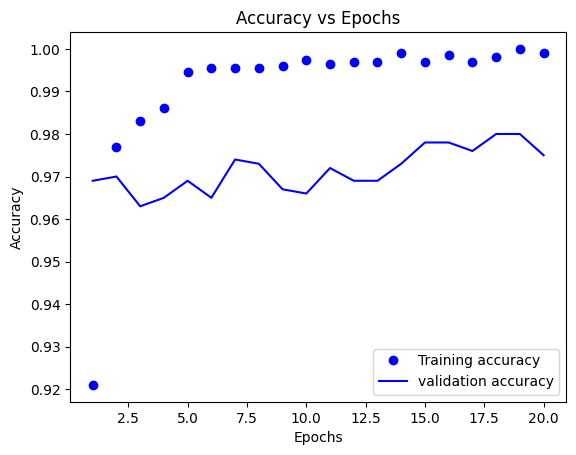

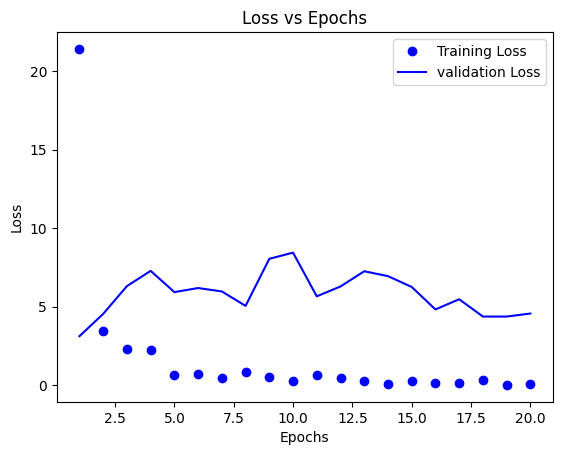

In [ ]:
import pandas as pd
# YOUR CODE HERE

data = pd.DataFrame(history_wcb.history)
epochs = range(1,len(data)+1)
plt.plot(epochs,data['accuracy'],'bo',label="Training accuracy")
plt.plot(epochs,data['val_accuracy'],'b',label="validation accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.figure()
plt.plot(epochs,data['loss'],'bo',label="Training Loss")
plt.plot(epochs,data['val_loss'],'b',label="validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")

plt.show()

In [ ]:
test_model = load_model("feature_extraction_keras")
test_loss, test_acc = test_model.evaluate(test_feature,test_labels)
print(f"Test accuracy:{test_acc:.3f}")

63/63 [==============================] - 0s 4ms/step - loss: 3.6704 - accuracy: 0.9715
Test accuracy:0.971


The pretrained conv base + newly trained classification head has achieved roughly **97%** accuracy!

Remember, for convnet_from_scratch_with_data_augmentation, it was ~ 85%

For convnet_from_scratch, it was ~ 70%

## Fine tuning

The key idea here is to fine tune some top layers of the conv base as well.

We do so by freezing most of the bottom layers, leaving only a few top layers to train. Lets see:

In [ ]:
# Load the convolutional base
conv_base = VGG16(
    weights = "imagenet",
    include_top = False, # Don't re-use the classifier (top layers)
    input_shape = (180,180,3)
)

In [ ]:
#Define the model
inputs = Input(shape=(180, 180, 3))
# x = data_augmentation(inputs)
x = preprocess_input(inputs)
x = conv_base(x)
x = Flatten()(x)
x = Dense(256)(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation="sigmoid")(x)
model = Model(inputs, outputs)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
#Freezing all layers until the fourth from the last
conv_base.trainable = True
for layer in conv_base.layers[:-4]:   #[1,2,3,4,5,6,7,8,9]
    layer.trainable = False

#  Model compilation and summary
# YOUR CODE HERE
model.compile(loss="binary_crossentropy",
              optimizer=RMSprop(learning_rate=1e-5), # use low learning rate to not vary the weights drastically
              metrics=["accuracy"])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 180, 180, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 180, 180, 3)       0         
 )                                                               
                                                                 
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 12800)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               3277

In [ ]:
## Callback function
callbacks = [ModelCheckpoint(filepath="fine_tuning_keras", save_best_only=True, monitor="val_loss")]

In [ ]:
## Training
history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 17s 225ms/step - loss: 3.8792 - accuracy: 0.8030 - val_loss: 0.4778 - val_accuracy: 0.9430
Epoch 2/30
63/63 [==============================] - 13s 206ms/step - loss: 0.8182 - accuracy: 0.9295 - val_loss: 0.2824 - val_accuracy: 0.9630
Epoch 3/30
63/63 [==============================] - 13s 205ms/step - loss: 0.3385 - accuracy: 0.9645 - val_loss: 0.2310 - val_accuracy: 0.9710
Epoch 4/30
63/63 [==============================] - 11s 171ms/step - loss: 0.2203 - accuracy: 0.9750 - val_loss: 0.2381 - val_accuracy: 0.9730
Epoch 5/30
63/63 [==============================] - 13s 209ms/step - loss: 0.0584 - accuracy: 0.9925 - val_loss: 0.2217 - val_accuracy: 0.9740
Epoch 6/30
63/63 [==============================] - 13s 210ms/step - loss: 0.1321 - accuracy: 0.9875 - val_loss: 0.2120 - val_accuracy: 0.9730
Epoch 7/30
63/63 [==============================] - 11s 169ms/step - loss: 0.0398 - accuracy: 0.9915 - val_loss: 0.2449 - val_accuracy: 0.9770

In [ ]:
## Evaluation
model = load_model("fine_tuning_keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

# OPTIONAL EXERCISE: plot the losses by using appropriate callbacks and tensorboard

63/63 [==============================] - 6s 95ms/step - loss: 0.3869 - accuracy: 0.9710
Test accuracy: 0.971


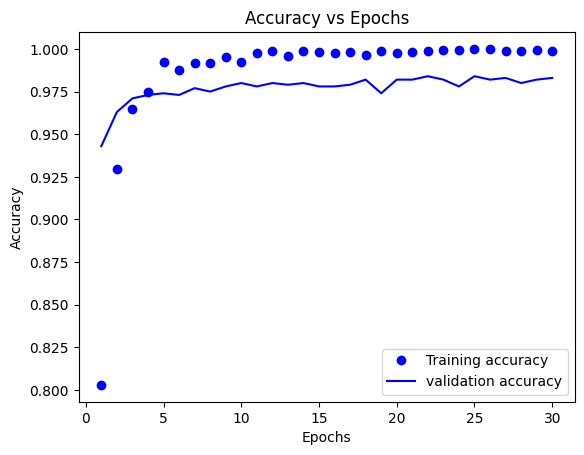

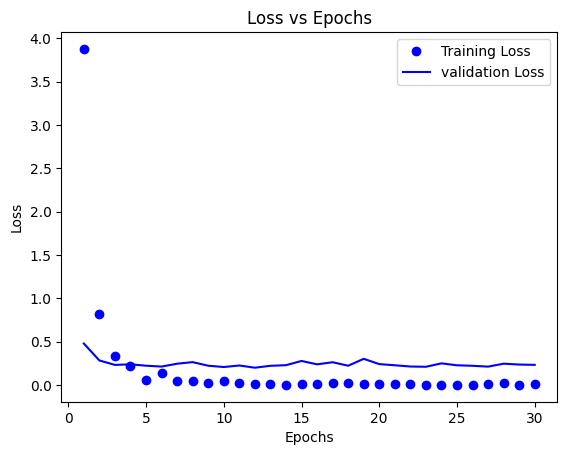

In [ ]:
data = pd.DataFrame(history.history)
epochs = range(1,len(data)+1)
plt.plot(epochs,data['accuracy'],'bo',label="Training accuracy")
plt.plot(epochs,data['val_accuracy'],'b',label="validation accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.figure()
plt.plot(epochs,data['loss'],'bo',label="Training Loss")
plt.plot(epochs,data['val_loss'],'b',label="validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")

plt.show()

# Using already run and saved models

For this save the model checkpoints in your drive (download the checkpoints and save to drive) give that path while loading.

Mount your G drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/"

Mounted at /content/drive
/content/drive/My Drive


For example, you downloaded the `feature_extraction_keras` model and saved it in your drive inside a folder named 'model'. You can load it here like this:

    model_saved_1 = load_model('/content/drive/MyDrive/model/feature_extraction_keras')

 In this case the file path is simply : '/content/feature_extraction_keras'

In [ ]:
model_fewa = load_model('/content/feature_extraction_keras')

In [ ]:
test_loss, test_acc = model_fewa.evaluate(test_feature, test_labels)
print(f"Test accuracy is:{test_acc:.3f}")

63/63 [==============================] - 0s 3ms/step - loss: 3.6704 - accuracy: 0.9715
Test accuracy is:0.971


Great! feature_extraction model has achieved **97%** accuracy!

### Please answer the questions below to complete the experiment:




In [ ]:
#@title  What is the main idea of transfer learning in deep learning? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "B) To use the pre-trained Convolutional Base (Conv_Base) as a feature extractor and add new layers to the top of the pre-trained model for fine-tuning on a new dataset or task." #@param ["", "A) To train the pre-trained Convolutional Base (Conv_Base) from scratch on a new dataset or task.", "B) To use the pre-trained Convolutional Base (Conv_Base) as a feature extractor and add new layers to the top of the pre-trained model for fine-tuning on a new dataset or task.", "C) To use the pre-trained Convolutional Base (Conv_Base) as the only layers for the new dataset or task without any modifications."]

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "NA" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 3873
Date of submission:  19 May 2024
Time of submission:  20:27:14
View your submissions: https://aimlops-iisc.talentsprint.com/notebook_submissions
